In [1]:
import numpy as np
import pandas as pd
import netCDF4
from netCDF4 import Dataset
from pandas.compat import StringIO

from datetime import datetime
from pathlib import Path
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
#data_new = xr.open_dataset('erai_hanle_downloaded.nc')

In [3]:
#data_new = data_new.to_dataframe()

In [6]:
#data_new

blh
latitude longitude time                            
32.75    79.0      2016-01-01 03:00:00     9.600098
                   2016-01-01 06:00:00   161.392334
                   2016-01-01 09:00:00   834.107849
                   2016-01-01 12:00:00   319.979614
                   2016-01-01 15:00:00    12.161255
                   2016-01-01 18:00:00    10.593140
                   2016-01-01 21:00:00    10.175049
                   2016-01-02 00:00:00     9.913696
                   2016-01-02 03:00:00    10.593140
                   2016-01-02 06:00:00   197.667725
                   2016-01-02 09:00:00  1853.060181
                   2016-01-02 12:00:00   387.669312
                   2016-01-02 15:00:00    11.272705
                   2016-01-02 18:00:00     9.338745
                   2016-01-02 21:00:00     8.972778
                   2016-01-03 00:00:00     8.868286
                   2016-01-03 03:00:00     8.659180
                   2016-01-03 06:00:00   126.580444
                   2016-01-03 09:00:00   576.573364
                   2016-01-03 12:00:00    23.503906
                   2016-01-03 15:00:00     9.861450
                   2016-01-03 18:00:00     9.809082
                   2016-01-03 21:00:00     9.600098
                   2016-01-04 00:00:00     9.495483
                   2016-01-04 03:00:00    10.331787
                   2016-01-04 06:00:00   201.640259
                   2016-01-04 09:00:00   590.424927
                   2016-01-04 12:00:00   369.427124
                   2016-01-04 15:00:00    93.441284
                   2016-01-04 18:00:00    83.562134
...                                             ...
                   2016-03-28 09:00:00  1044.651611
                   2016-03-28 12:00:00   868.083374
                   2016-03-28 15:00:00    11.847656
                   2016-03-28 18:00:00    10.802246
                   2016-03-28 21:00:00    10.697754
                   2016-03-29 00:00:00    10.906860
                   2016-03-29 03:00:00    56.277222
                   2016-03-29 06:00:00   473.444458
                   2016-03-29 09:00:00   998.183533
                   2016-03-29 12:00:00  1028.343384
                   2016-03-29 15:00:00    22.928955
                   2016-03-29 18:00:00    11.690918
                   2016-03-29 21:00:00    13.049927
                   2016-03-30 00:00:00    53.663696
                   2016-03-30 03:00:00   202.528809
                   2016-03-30 06:00:00   490.380005
                   2016-03-30 09:00:00  1068.800293
                   2016-03-30 12:00:00  1122.481689
                   2016-03-30 15:00:00    15.349731
                   2016-03-30 18:00:00    11.272705
                   2016-03-30 21:00:00    10.331787
                   2016-03-31 00:00:00    10.436401
                   2016-03-31 03:00:00    66.417603
                   2016-03-31 06:00:00   312.086792
                   2016-03-31 09:00:00   852.977356
                   2016-03-31 12:00:00   890.507263
                   2016-03-31 15:00:00    27.946899
                   2016-03-31 18:00:00    13.677124
                   2016-03-31 21:00:00    11.272705
                   2016-04-01 00:00:00    10.540894

[728 rows x 1 columns]

In [2]:

data_hanle = xr.open_dataset('D:/Codes/IIA Project/Project Data/2.ERA-Interim/erai_Hanle.nc')
data_merak = xr.open_dataset('D:/Codes/IIA Project/Project Data/2.ERA-Interim/erai_Merak.nc')


In [5]:
data_hanle2 = Dataset('D:/Codes/IIA Project/Project Data/2.ERA-Interim/erai_Hanle.nc')

In [9]:
data_hanle2.variables['blh'][:]

masked_array(
  data=[[[  8.80161198]],

        [[277.48947808]],

        [[795.30748684]],

        ...,

        [[ 10.22857034]],

        [[  9.89281543]],

        [[  9.47312179]]],
  mask=False,
  fill_value=1e+20)

In [5]:
data_merak = data_merak.to_dataframe()

In [6]:
data_hanle = data_hanle.to_dataframe()

In [7]:
data_hanle = data_hanle.reset_index()
data_merak = data_merak.reset_index()

In [22]:
type(data_hanle['time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
final = pd.DataFrame(columns = ['date','time', 'hanle_pblh', 'merak_pblh'])

In [9]:
final['hanle_pblh'] = data_hanle['blh']/1000 #in kms
final['merak_pblh'] = data_merak['blh']/1000 #in kms
final['time'] = data_hanle['time'].apply(lambda x:x.time())
final['date'] = data_hanle['time'].apply(lambda x:x.date())


In [24]:
final.head(10)

,date,time,hanle_pblh,merak_pblh
0,1979-01-01,03:00:00,0.008802,0.009013
1,1979-01-01,06:00:00,0.277490,0.233505
2,1979-01-01,09:00:00,0.795308,0.594307
3,1979-01-01,12:00:00,0.291256,0.399918
4,1979-01-01,15:00:00,0.010229,0.009779
5,1979-01-01,18:00:00,0.009893,0.009609
6,1979-01-01,21:00:00,0.009557,0.009269
7,1979-01-02,00:00:00,0.009137,0.008928
8,1979-01-02,03:00:00,0.009054,0.008844
9,1979-01-02,06:00:00,0.283114,0.228488


In [61]:
#np.ma.filled(data_merak['blh'])

#np.ravel(np.ma.filled(data_hanle['blh'])) # converts into 1D array i.e. flattens it
#np.ravel(np.ma.filled(data_merak['blh']))

#pblh1

#the code below is when time was manually entered
#year,month,date can be separated from time column using apply and lambda


#print(len(time_array))

#type(time_array)
#it is a masked array and hence requires you to fill data with np.ma.filled
np.ma.filled()

#print(len(pblh_array))

#start_time = datetime.datetime.strptime("1900-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#specifying start time

#(start_time + datetime.timedelta(hours = 692499))

#erai['Year'] = erai['time'].apply(lambda x: (start_time+datetime.timedelta(hours=x)).year)


#erai['Month'] = erai['time'].apply(lambda x: (start_time+datetime.timedelta(hours=x)).month)


#erai['Day'] = erai['time'].apply(lambda x: (start_time+datetime.timedelta(hours=x)).day)


#erai['Hour'] = erai['time'].apply(lambda x: (start_time+datetime.timedelta(hours=x)).hour)


#erai.head(10)

array([[[  9.01359866]],

       [[233.50524065]],

       [[594.30752737]],

       ...,

       [[ 10.11904993]],

       [[  9.77891108]],

       [[  9.60884165]]])

In [35]:
final.to_csv('D:/Codes/IIA Project/Output Data/erai_Interim_Full.txt',index=False,sep = '\t')

In [13]:
#daily average
avg_daily = final[['date','hanle_pblh','merak_pblh']].groupby(['date']).agg('mean')

In [22]:
median_daily = final.groupby(['date']).agg('median')

In [27]:
erai_daily = pd.merge(avg_daily,median_daily,how='inner',left_index=True,right_index=True,suffixes=('_avg','_median'))


In [29]:
final_nighttime = final[lambda df: (df.time >= datetime.strptime('18:00:00','%H:%M:%S').time()) | (df.time <= datetime.strptime('06:00:00','%H:%M:%S').time())]

In [21]:
#final_nighttime1=final[(final['time'] >= datetime.strptime('18:00:00','%H:%M:%S').time()) | (final['time'] <= datetime.strptime('06:00:00','%H:%M:%S').time())]

In [ ]:
#see if there are other ways to do it. if datetime is index then you can use between_time

In [30]:
final_daytime = final[lambda df: (df.time < datetime.strptime('18:00:00','%H:%M:%S').time()) & (df.time >= datetime.strptime('06:00:00','%H:%M:%S').time())]

In [32]:
avg_daytime = final_daytime.groupby(['date']).mean()
median_daytime = final_daytime.groupby(['date']).median()

In [34]:
erai_daytime = pd.merge(avg_daytime,median_daytime,how='inner',left_index=True,right_index=True,suffixes=('_avg','_median'))

In [33]:
avg_nighttime = final_nighttime.groupby(['date']).mean()
median_nighttime = final_nighttime.groupby(['date']).median()

In [36]:
erai_nighttime = pd.merge(avg_nighttime,median_nighttime,how='inner',left_index=True,right_index=True,suffixes=('_avg','_median'))

In [48]:
avg_daily.to_csv('D:/Codes/IIA Project/Output Data/erai_interim_daily_avg.txt',sep='\t')
avg_daytime.to_csv('D:/Codes/IIA Project/Output Data/erai_interim_daytime_avg.txt',sep='\t')
avg_nighttime.to_csv('D:/Codes/IIA Project/Output Data/erai_interim_nighttime_avg.txt',sep='\t')

In [38]:
erai_daily.to_csv('D:/Codes/IIA Project/Output Data/era_interim_daily.txt',sep='\t')
erai_daytime.to_csv('D:/Codes/IIA Project/Output Data/era_interim_daytime.txt',sep='\t')
erai_nighttime.to_csv('D:/Codes/IIA Project/Output Data/era_interim_nighttime.txt',sep='\t')

In [55]:
#for groupname,group in final.groupby('date'):
    #print(groupname)
    #print(group)

In [39]:
final['year'] = final['date'].apply(lambda x: x.year)
final['month'] = final['date'].apply(lambda x: x.month)

In [43]:
avg_monthly = final.groupby(['year','month']).mean().reset_index([0,1])

In [44]:
median_monthly = final.groupby(['year','month']).median().reset_index([0,1])

In [41]:
median_monthly.head(10)

,year,month,hanle_pblh,merak_pblh
0,1979,1,0.094419,0.082058
1,1979,2,0.113180,0.082484
2,1979,3,0.266326,0.480701
3,1979,4,0.244838,0.257740
4,1979,5,1.104286,1.108002
5,1979,6,1.082084,1.017780
6,1979,7,0.794594,0.823051
7,1979,8,0.788635,0.947286
8,1979,9,0.809158,0.774198
9,1979,10,0.573961,0.603194


In [45]:
avg_monthly.head(10)

,year,month,hanle_pblh,merak_pblh
0,1979,1,0.429622,0.493047
1,1979,2,0.588977,0.625776
2,1979,3,0.743481,0.954162
3,1979,4,0.737667,0.591158
4,1979,5,1.320015,1.328934
5,1979,6,1.114753,1.118194
6,1979,7,0.951583,1.024799
7,1979,8,1.004560,1.135887
8,1979,9,1.029618,1.051981
9,1979,10,0.913809,0.955146


In [52]:
erai_monthly = pd.merge(avg_monthly,median_monthly,how='inner',left_on=['year','month'],right_on=['year','month'],suffixes=('_avg','_median'))

In [53]:
erai_monthly.head(10)

,year,month,hanle_pblh_avg,merak_pblh_avg,hanle_pblh_median,merak_pblh_median
0,1979,1,0.429622,0.493047,0.094419,0.082058
1,1979,2,0.588977,0.625776,0.113180,0.082484
2,1979,3,0.743481,0.954162,0.266326,0.480701
3,1979,4,0.737667,0.591158,0.244838,0.257740
4,1979,5,1.320015,1.328934,1.104286,1.108002
5,1979,6,1.114753,1.118194,1.082084,1.017780
6,1979,7,0.951583,1.024799,0.794594,0.823051
7,1979,8,1.004560,1.135887,0.788635,0.947286
8,1979,9,1.029618,1.051981,0.809158,0.774198
9,1979,10,0.913809,0.955146,0.573961,0.603194


In [46]:
avg_monthly.to_csv('D:/Codes/IIA Project/Output Data/erai_interim_monthly_avg.txt',sep='\t',index=False)

In [54]:
erai_monthly.to_csv('D:/Codes/IIA Project/Output Data/era_interim_monthly.txt',sep='\t',index=False)

In [46]:
#avg_result = []
#for the_date in set(final['date']): #or use final['date'].unique
    #data_per_date = final[final['date'] == the_date]
    #date_avg = {}
    #date_avg['date'] = the_date
    #date_avg['hanle'] = np.mean(data_per_date['hanle_pblh'])
    #date_avg['merak'] = np.mean(data_per_date['merak_pblh'])
    #avg_result.append(date_avg)

In [50]:
avg_matching_date = avg_nighttime[datetime.strptime('2011-11-14','%Y-%m-%d').date():datetime.strptime('2013-03-26', '%Y-%m-%d').date()]

In [15]:
seeing_data = pd.read_csv('seeing-hanle-2k11-2k13.dat', sep="\s+")

In [16]:
seeing_data.head(10)


,YYYY,MM,DD,PT,See1,See2,std
0,2011,11,14,44,1.228,1.145,0.389
1,2011,11,15,1,1.060,1.060,0.000
2,2011,11,16,9,1.231,1.270,0.114
3,2011,11,18,193,1.208,1.200,0.186
4,2011,11,19,151,1.133,1.110,0.164
5,2011,11,20,259,1.106,1.090,0.148
6,2011,11,21,265,0.988,0.970,0.131
7,2011,11,22,258,1.336,1.330,0.403
8,2011,11,23,159,2.017,1.990,0.541
9,2011,11,24,164,1.319,1.315,0.186


In [17]:
seeing_data['date'] =seeing_data[['YYYY','MM','DD']].apply(lambda x: datetime(x[0],x[1],x[2]),axis = 1)

In [18]:

del seeing_data['YYYY']

In [26]:
matching_data = pd.read_csv('D:/Codes/IIA Project/Output Data/era_interim_nighttime.txt',sep='\t')

In [27]:
matching_data.head(10)

,date,hanle_pblh_avg,merak_pblh_avg,hanle_pblh_median,merak_pblh_median
0,1979-01-01,0.076435,0.065349,0.009725,0.009439
1,1979-01-02,0.064033,0.052806,0.009305,0.008928
2,1979-01-03,0.060021,0.047704,0.008634,0.008844
3,1979-01-04,0.061364,0.041973,0.009054,0.009013
4,1979-01-05,0.046087,0.036208,0.009054,0.009184
5,1979-01-06,0.037072,0.035902,0.010397,0.010799
6,1979-01-07,0.041471,0.034507,0.010984,0.010799
7,1979-01-08,0.049445,0.041446,0.012075,0.011395
8,1979-01-09,0.064017,0.056769,0.021561,0.024065
9,1979-01-10,0.035562,0.043487,0.011991,0.012245


In [28]:
del seeing_data['MM']
del seeing_data['DD']

KeyError: 'MM'

In [31]:
matching_data.set_index('date',inplace = True)

In [21]:
seeing_data.set_index('date',inplace=True)

In [25]:
seeing_data.head(10)

,PT,See1,See2,std
date,,,,
2011-11-14,44,1.228,1.145,0.389
2011-11-15,1,1.060,1.060,0.000
2011-11-16,9,1.231,1.270,0.114
2011-11-18,193,1.208,1.200,0.186
2011-11-19,151,1.133,1.110,0.164
2011-11-20,259,1.106,1.090,0.148
2011-11-21,265,0.988,0.970,0.131
2011-11-22,258,1.336,1.330,0.403
2011-11-23,159,2.017,1.990,0.541


In [32]:
merged = pd.merge(matching_data,seeing_data,how='right',left_index=True,right_index=True)

In [33]:
merged.head(5)

,hanle_pblh_avg,merak_pblh_avg,hanle_pblh_median,merak_pblh_median,PT,See1,See2,std
date,,,,,,,,
2011-11-14,0.425960,0.407197,0.057906,0.048640,44,1.228,1.145,0.389
2011-11-15,0.424802,0.411942,0.041958,0.054762,1,1.060,1.060,0.000
2011-11-16,0.191066,0.176498,0.051862,0.076616,9,1.231,1.270,0.114
2011-11-18,0.152035,0.108521,0.011488,0.012755,193,1.208,1.200,0.186
2011-11-19,0.104962,0.059099,0.012579,0.026446,151,1.133,1.110,0.164


In [117]:
merged.to_csv('merged_erai_seeing_han.csv')

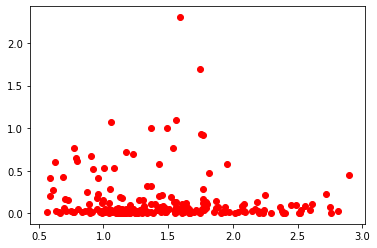

In [39]:
plt.scatter(merged['See1'],merged['hanle_pblh_median'],c='r')

In [46]:
merged.corr()

,hanle_pblh_avg,merak_pblh_avg,hanle_pblh_median,merak_pblh_median,PT,See1,See2,std
hanle_pblh_avg,1.000000,0.926168,0.799053,0.716819,-0.086260,-0.263001,-0.264786,-0.161773
merak_pblh_avg,0.926168,1.000000,0.768524,0.821122,-0.104412,-0.187901,-0.191686,-0.136758
hanle_pblh_median,0.799053,0.768524,1.000000,0.838919,-0.053969,-0.056958,-0.063660,-0.037304
merak_pblh_median,0.716819,0.821122,0.838919,1.000000,-0.094952,0.027234,0.021586,-0.034231
PT,-0.086260,-0.104412,-0.053969,-0.094952,1.000000,-0.191973,-0.205534,0.275790
See1,-0.263001,-0.187901,-0.056958,0.027234,-0.191973,1.000000,0.996050,0.380001
See2,-0.264786,-0.191686,-0.063660,0.021586,-0.205534,0.996050,1.000000,0.365228
std,-0.161773,-0.136758,-0.037304,-0.034231,0.275790,0.380001,0.365228,1.000000


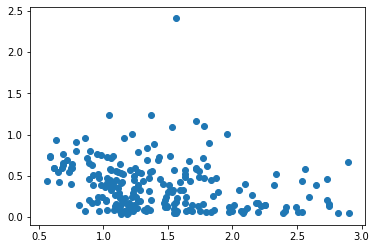

In [47]:
plt.scatter(merged['See2'],merged['hanle_pblh_avg'])